In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from numpy.linalg import eig
from numpy.linalg import inv
from numpy import diag
import matplotlib.pyplot as plt
%matplotlib inline

## Table of Contents
* [What are eigenvalues and eigenvectors?](#section_1_1)
    * [Definitions](#section_1_1)
* [What is the eigenbasis?](#section_2_1)
    * [Definition](#section_2_1)
* [What is the spectrum of a matrix??](#section_3_1)
    * [Definition](#section_3_1)
* [How do we compute the eigenvalues and eigenvectors of a matrix?](#section_4_1)
    * [Manual approach](#section_4_1)
    * [Computation with functions](#section_4_2)
    * [Matrix reconstruction](#section_4_3)
* [What is projection?](#section_5_1)
    * [Simple definition](#section_5_1)
    * [Mathematical representations of projection](#section_5_2)
    * [Compuation of the projection](#section_5_3)
    * [Projection presentation](#section_5_3)
 * [How does projection conserve shapes?](#section_6_1)
     * [Projections general overview](#section_6_1)
     * [Projections and benefits](#section_6_2)
 * [What is PCA?](#section_7_1)
     * [PCA - step by step (diagram)](#section_7_1)
     * [What are principal components?](#section_7_2)
     * [What is variance? What is explained variance?](#section_7_3)
     * [How do principal components relate to explained variance?](#section_7_3)
 * [How is PCA implemented?](#section_8_1)
     * [User case 1: Numbers classification](#section_8_1)
         * [Introduction](#section_8_1_1)
         * [Coding](#section_8_1_2)
         * [Info](#section_8_1_3)
         * [Conclusion](#section_8_1_4)
         * [Further into the matter](#section_8_1_5)
         * [Conclusion 2](#section_8_1_6)
     * [User case 2: Compress image using PCA](#section_9_1)
         * [Introduction](#section_9_1_1)
         * [Coding - step by step](#section_9_1_2)
         * [Coding - compression with loop](#section_9_1_3)
         * [Conclusion](#section_9_1_4)
 * [Resources](#section_10_1)
     * [Eigenvalues and eigenvectors](#section_10_1)
     * [Projection](#section_10_2)
     * [PCA](#section_10_3)
     * [Other](#section_10_4)


        

## Eigenvalues and eigenvectors definitions <a class="anchor" id="section_1_1"></a>
<b>Eigenvectors</b> are the vectors that when multiplied by a matrix (linear combination or transformation) result in another vector having the same direction but scaled (hence scaler multiple) in forward or reverse direction by a magnitude of the scaler multiple which can be termed as <b>Eigenvalue</b>. In simpler words, the eigenvalues are scalar values that represent the scaling factor by which a vector is transformed when a linear transformation is applied. In other words, eigenvalues are the values that scale eigenvectors when a linear transformation is applied.

### Properties:

- Eigenvectors are non-zero vectors: Eigenvectors cannot be zero vectors, as this would imply that the transformation has no effect on the vector.
 - Eigenvalues can be real or complex: Eigenvalues can be either real or complex numbers, depending on the matrix being analyzed.
 - Eigenvectors can be scaled: Eigenvectors can be scaled by any non-zero scalar value and still be valid eigenvectors.
 - Eigenvectors can be orthogonal: Eigenvectors that correspond to different eigenvalues are always orthogonal to each other.
 
### Use cases:

 - <b>Feature extraction</b>: Feature extraction is a process of identifying the most important features of a dataset that can be used to model and analyze the data. Eigenvalues and eigenvectors can be used to extract the most important features of a dataset by identifying the directions of maximum variation in the data. 
 - <b>Principal component analysis (PCA)</b>: Principal component analysis (PCA) is a widely used technique for data dimensionality reduction that is based on the eigendecomposition of the covariance matrix of the data. PCA works by finding the eigenvectors and eigenvalues of the covariance matrix and using them to project the data onto a lower-dimensional space. The resulting projected data can then be used for further analysis, such as clustering or classification.
 - <b>Spectral Clustering</b>: Clustering is a process of grouping similar data points together based on some similarity metric. One kind of clustering known as spectral clustering makes use of the concept of Eigenvalues and Eigenvectors. Spectral clustering is a graph-based clustering method that uses the eigenvalues and eigenvectors of the similarity matrix of the data points to partition the data into clusters.


## Eigenbasis definition <a class="anchor" id="section_2_1"></a>
An eigenbasis is a basis in which every vector is an eigenvector.<br>
<b>Example:</b>
We have a matrix A:
$$A=
  \begin{bmatrix}
    0 & 1 \\
    -2 & -3
  \end{bmatrix}$$
 The eigenvalues are respectively: $\lambda = -2 ; \lambda = -1$ <br>
 In this particular case the following two vectors belong to eigenbasis:<br>
 $$
  \begin{bmatrix}
    1 \\
    -1
  \end{bmatrix}  \begin{bmatrix}
    2 \\
    -2
  \end{bmatrix}$$

##  Spectrum of a matrix definition <a class="anchor" id="section_3_1"></a>
From $A\vec{x} = \lambda\vec{x}$ we are going to find out that there is a finite number of eigenvalues ($\lambda$). Those could be doneted as: $\Lambda(A)  = \{ \lambda_0,\lambda_1...\lambda_n \}$ and represent the set of all eigenvalues coresponding to matrix A.That is known as <b>spectrum of a matrix A.</b>
The <b>spectral radius of matrix A</b> is the maxmimum absolute value of the eigenvalues:
$$ \rho (A)=\max \left\{|\lambda _{1}|,\dotsc ,|\lambda _{n}|\right\}$$

## Eigenvalues and eigenvectors computation - Manual approach <a class="anchor" id="section_4_1"></a>


Let's start from the definition: An eigenvector is a nonzero vector that satisfies the equation $A\vec{x} = \lambda\vec{x}$ where A is a square matrix (2, 2) or (3, 3), $\lambda$ is a scalar, and $\vec{x}$ is the eigenvector. $\lambda$ is called an eigenvalue. It is important to note that $x \neq 0$ and $\lambda \in R$. <br>
<b>Example:</b>
$$A=
  \begin{bmatrix}
    0 & 1 \\
    -2 & -3
  \end{bmatrix}$$
We put the identity matrix on the right  $\lambda I \vec{x}$. The identity matrix does not change anything. It is just a multiplication by 1. 

$$I=
  \begin{bmatrix}
    1 & 0 \\
    0 & 1
  \end{bmatrix}$$
$A\vec{x} - \lambda I \vec{x} = 0$ <br>
$\vec{x}(A - \lambda I ) = 0$. Now let's call $A - \lambda I$ a new matrix <b>B</b>. The equation suggests that if we multiply <b>B</b> with $\vec{x}$ (which we set to be  $x \neq 0$) we get 0. This means that <b>B</b> is not invertable. Furthermore $ \det(A - \lambda I) = 0 $. We can check it 

$$
  \begin{bmatrix}
    0 & 1 \\
    -2 & -3
  \end{bmatrix} - \begin{bmatrix}
    \lambda & 0 \\
    0 & \lambda
  \end{bmatrix} = \begin{bmatrix}
    -\lambda & 1 \\
    -2  & -3\lambda
  \end{bmatrix} = 3\lambda + \lambda^2 + 2 = 0
  $$ <br>
  $$(\lambda + 2) (\lambda + 1 ) = 0$$
  This gives us the roots (Eigenvalues) which are $\lambda = -2 ; \lambda = -1$ <br>
  Now we can find the corresponding eigenvectors: <br>
  Example: $\lambda = -1$<br>
  $$
  \begin{bmatrix}
    0 & 1 \\
    -2 & -3
  \end{bmatrix}\begin{bmatrix}
    x_1  \\
    x_2
  \end{bmatrix}= -1\begin{bmatrix}
    x_1  \\
    x_2
  \end{bmatrix}$$
   = $$\begin{array}{lcl} x_2 & = & - x_1 \\ 2x_1 - 3x_2 & = & -x_2 \end{array}$$
    = $$\begin{array}{lcl} -2 x_1 & = & 2x_2  \end{array}$$
    = $$\begin{array}{lcl} x_1 & = & - x_2  \end{array}$$
 At this point we can use any vector that setisfies $\begin{array}{lcl} x_1 & = & - x_2  \end{array}$. A couple of examples:$$
  \begin{bmatrix}
    1 \\
    -1
  \end{bmatrix} or \begin{bmatrix}
    2 \\
    -2
  \end{bmatrix}$$

## Eigenvalues and eigenvectors computation with functions <a class="anchor" id="section_4_2"></a>

In [2]:
def calc_w_v(matrix):
    '''
    The function expects a matrix NxN in np.array format
    Return format is tuple of two elements that are eigenvalues and eigenvectors
    '''
    w,v=eig(matrix)
    return w, v

def reconstruct_matrix(vectors, values):
    '''
    The function expects eigenvalues and eigenvectors as input params
    Creates inverse of eigenvectors matrix
    Creates diagonal matrix from eigenvalues
    Reconstructs the original matrix
    Return value is a matrix in np.array format
    '''
    inverse_vectors = inv(vectors)
    diagonal_matrix = diag(values)
    diagonal_matrix = vectors.dot(diagonal_matrix).dot(inverse_vectors)
    return diagonal_matrix

In [3]:
#Examples of eigenvalues and eigenvectors computation:
two_by_two = calc_w_v(np.array([[0, -2], [1, -3]]))
print(f"Eigenvalues: {two_by_two[0]}")
print(f"Eigenvectors: {two_by_two[1]}")
three_by_three = calc_w_v(np.array([[2, 2, 4], [1, 3, 5], [2, 3, 4]]))
print(f"Eigenvalues: {three_by_three[0]}")
print(f"Eigenvectors: {three_by_three[1]}")

Eigenvalues: [-1. -2.]
Eigenvectors: [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]
Eigenvalues: [ 8.80916362  0.92620912 -0.73537273]
Eigenvectors: [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]


## Original matrix reconstructions <a class="anchor" id="section_4_3"></a>

In [4]:

print(reconstruct_matrix(two_by_two[1], two_by_two[0]))
print(reconstruct_matrix(three_by_three[1], three_by_three[0]))

[[ 0. -2.]
 [ 1. -3.]]
[[2. 2. 4.]
 [1. 3. 5.]
 [2. 3. 4.]]


## Projection definition in terms of vectors<a class="anchor" id="section_5_1"></a>
Projection is some vector in L where  $\vec v1$ - $Proj_L(\vec v1)$ is orthogonal to <b>L</b>. <b>L</b> can be defined as all of the possible scalar multiples of some vector. </br> Let's look at the following diagam that represents an imaginary scenario:
![title](vector_projection_new.png)

We can think of the projection as a shadown of some object onto a line or a flat surface. In our imaginary scenario, we have a stright line and <b>$\vec v1$</b>. If we put a light bulb that shines orthogonally to L, then the segment between point 0,0 and H which is also a vector is the project of $\vec v1$ onto L. In other words, this very same segment is the shadow of $\vec v1$ onto L. 

## Mathematical representations of projection <a class="anchor" id="section_5_2"></a>
Known things: <br>
By definition we know that $$Proj_L(\vec v1) = c \vec v$$ <br>
We also know that the lenght of $$EF = \vec v1 - Proj_L(v1)$$ <br>
Now we can rewrite the projection to: $$(\vec v1 -c \vec v)\vec v = 0$$
= $$\vec v1\vec v - c \vec v \vec v = 0$$
= $$\vec v1\vec v = c \vec v \vec v$$
= $$  c =  \frac {\vec v1\vec v} {\vec v \vec v}$$
Though we see 4 vectors in the last equation, the final result (C) will be a number. Now going back to the projection, we now have the following:
$$Proj_L(\vec v1) = c \vec v = (\frac {\vec v1\vec v} {\vec v \vec v}) \vec v$$
In simple terms, we scale $\vec v$ to find out the projection of $\vec v1 $ on L.

## Projection computation<a class="anchor" id="section_5_3"></a>
Data at the beginning:
$$v = \begin{bmatrix} 2  \\ 1 \end{bmatrix}$$ <br>
$$v1 = \begin{bmatrix} 2  \\ 3 \end{bmatrix}$$ <br>
$$L = \{c\vec{v}\}\vert c\in\mathbb{R}$$
The main forumula:
$$Proj_L(\vec v1) = c \vec v = (\frac {\vec v1\vec v} {\vec v \vec v}) \vec v$$
Actual computation:
$$Proj_L(\vec v1) = \frac{\begin{bmatrix} 2  \\ 3 \end{bmatrix} \begin{bmatrix} 2  \\ 1 \end{bmatrix}}{\begin{bmatrix} 2  \\ 1 \end{bmatrix} \begin{bmatrix} 2  \\ 1 \end{bmatrix}}\begin{bmatrix} 2  \\ 1 \end{bmatrix}$$
 $$ =\frac{7}{5}\begin{bmatrix} 2  \\ 1 \end{bmatrix}$$
 $$ = \begin{bmatrix} \frac{14}{5}  \\ \frac{7}{5} \end{bmatrix}$$
  $$ = \begin{bmatrix} 2.8  \\ 1.4 \end{bmatrix}$$

## Projection presentation<a class="anchor" id="section_5_4"></a>

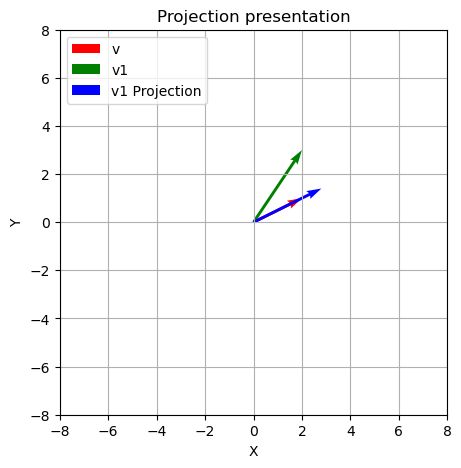

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
v = np.array([2 ,  1])
v1 = np.array([2 ,  3])
v1_proj = (np.dot(v1, v) / np.dot(v, v)) * v
scale_factor = 0.5
ax.quiver(0, 0, v[ 0], v[1 ], color='r', angles='xy', scale_units='xy', scale=1, label="v")
ax.quiver(0, 0, v1[ 0], v1[1 ], color='g', angles='xy', scale_units='xy', scale=1, label="v1")
ax.quiver(0, 0, v1_proj[ 0], v1_proj[1 ], color='b', angles='xy', scale_units='xy', scale=1, label="v1 Projection")
ax.set_xlim([-8,  8])
ax.set_ylim([-8,  8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Projection presentation')
plt.grid()
leg = plt.legend(loc= 'upper left')
plt.show()
    

## Projections general overview<a class="anchor" id="section_6_1"></a>
Projections are mathematical calculations that allow us to draw the round or curvy objects on a flat screen or piece of paper. For example, drawing a map of the planet Earth on a sheet of paper would be a use case. 

Every attempt to draw a map of the planet Earth deforms the final result to some degree. It is impossible to represent a curved surface on a flat one screen without stretching, skewing, deforming it in some way. Map projections apply this distortion in a systematic way that allows us to control where and how it happens.

## Projections and benefits<a class="anchor" id="section_6_2"></a>

- Conformal projection is one in which every angle between two curves that cross each other is preserved in the image of the projection. This approach preerves the shapes of features. But the cost of this quality is the distortion of areas and distances.

- Equal area projections preserve area, at the expense of angles, so the shapes of some places appear skewed. A map based on equal area projection would show regions that are the same size on the Earth the same size on the map but may distort the shape, angle, and/or scale

- This Mollewide Projection map correctly shows the areas of features with relation to each other but distorts the shapes of features.

- Equidistant projections preserve distances, although only from certain points or along certain lines on the map.

## What is PCA <a class="anchor" id="chapter7"></a>
PCA or Principal component analysis is a dimensionality reduction method that is used to reduce the dimensionality of large data sets.This is done by transforming larger sets of variables into a smaller ones that still contains most of the information in the larger sets. <br>
As expected decreasing the number of dimensions (variables) in a data set affects some aspects of the accuracy. The main goal of PCA is to trade accuracy for simplicity. This is because smaller data sets are easier to explore and visualize. 


### PCA step by step<a class="anchor" id="section_7_1"></a>
<img src="pca_steps.png" alt="PCA step by step" style="width: 800px;"/>

### What are principal components?<a class="anchor" id="section_7_2"></a>
Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 15-dimensional data gives you 15 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on until there is something to put. 

### What is variance? What is explained variance?<a class="anchor" id="section_7_3"></a>
The term <b>variance</b> refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean (average), and thus from every other number in the set</br></br>
<b>Explained variance</b> is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method. In very basic terms, it refers to the amount of variability in a data set that can be attributed to each individual principal component. In other words, it tells us how much of the total variance is “explained” by each component.

### How do principal components relate to explained variance?<a class="anchor" id="section_7_4"></a>
The total variance is the sum of variances of all individual principal components. The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance.

## Use case 1: Numbers classification <a class="anchor" id="section_8_1"></a>

### Introduction<a class="anchor" id="section_8_1_1"></a>
We have a task in which we have to classify hand written numbers. The input is similar to the following image:<br><img src="numbers.png" alt="Numbers" style="width: 400px;"/> What is shown on the image needs to be turned to <b>0 1 2 9 </b>. Represenation of one number is as follows: 

<img src="number_zoomed.png" alt="Number zoomed" style="width: 400px;"/>
What we have on the second image is a random number represented in an 8x8 square. In the matrix on the right we see numbers that represent the color of any particular pixel. Zero is black and any number higher than 0 is approaching white.<br><br> In other words we have 64 pixel in the matrix and each one of those pixel has a number. What makes an impression is that <u>some numbers </u>do not play a significant role in defining the shape of the number. More specifically those are the zeros - the black color. <br><br>
Based on an intuition we may say that if we disregard the black color, we would still be able to classify the number. We can put it this way, even with a fewer number of components we may achieve the same result. <br><br>
<b>Important</b> - those 64 pixels in the matrix are our 64 components<br><br>
Reducing the number of components would guarantee the following benefits: 


 - Faster model training and less computing resources 
 - Data visualization becomes possible if the number of dimensions is up to 3 
 - The data get denoised and compressed 

### Coding<a class="anchor" id="section_8_1_2"></a>

In [6]:
# Step 1 - load the data set
dataset = load_digits()

# Step 2 - check the shape - we have 1797 samples and 64 columns 
dataset.data.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

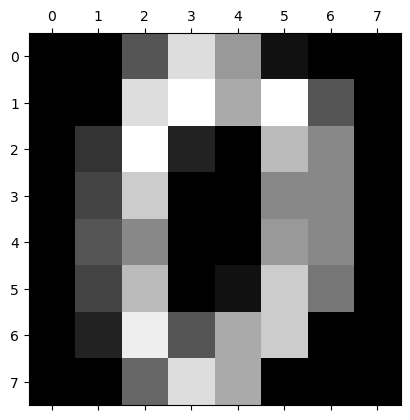

In [7]:
# Step 3 - plot a random number
# Requirements - the first (or any) element of the dataset is one dimensional array. Since this is np array, we can use
# reshape method to turn the original array into two dimensions 8x8 array. We pass the latter to plt.matshow
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [8]:
# Step - 4 check the target
# Details : the format of dataset is dictionary. We can check its keys by calling .keys() method. The we can call
# the target directly. As we can see the lenght of target matches the number of samples we have. The unique values
# are between 0 and 9 which means that any sample in those 1797 is a number in the following range(0, 10). This
# range is our classes
print(dataset.keys())
dataset.target
print(len(dataset.target))
np.unique(dataset.target)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
1797


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
# Step - 5 create dataframe and assign feature_name
# We also check the description of the dataframe. Here we see min and max values and also the values of the
# pixels that carry information is between 0 and 16. 
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [10]:
# Step - 6 create X and Y axis
x = df # This is the entire dataframe
y = dataset.target # Those are number from 0 to 9 - the classes 

In [11]:
# Step - 7 scale the features (mean 0, variance 1)
# We scale the features in order to avoid unrealistic results
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [12]:
# Step - 8 - split data to test and train sets
# Important params: test_size=0.2 means - 80% for training and 20% for tests (70/30 is also acceptable); 
# random_state - Controls the shuffling applied to the data before applying the split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=30)

In [13]:
# Step - 9 - train the model
# Here we create the model and then pass the train set
# The score (accuracy) can be checked by passing the test set
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9722222222222222

In [14]:
# Step - 10 - build PCA - by passing a percentage
# This approach forces PCA toread 95% of the useful features and create new dimensions
percentage = 0.95
pca = PCA(percentage)
x_pca = pca.fit_transform(x)
x_pca.shape #There will be significant difference between x.shape and x_pca.shape
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

### Info: <a class="anchor" id="section_8_1_3"></a>
In step 9 we saw that PCA calculated new dimensions for us. The total number dropped from 64 (<i>x.shape</i>) to 29 (<i>x_pca.shape</i>). Another way to check the number of components is by calling <i>pca.n_components</i>. <br><br> Looking at <u>pca.explained_variance_ratio_</u> we can see those new dimensions and how much variance each column carries. In other words what percentage of the useful information is included. Example:

- PC1 - 14.89%
- PC2 - 13.61%
- PC3 - 11.79%

In [15]:
# Step - 11 - train the model again using ther NEW dataframe
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(x_pca_train, y_pca_train)
model_pca.score(x_pca_test, y_pca_test)

0.9694444444444444

### Conclusion: <a class="anchor" id="section_8_1_4"></a>
The shape of the origianl dataset was 1797x64. We have trained a mode with it and achieved 97.22% accuracy. Then we build PCA requesting 95% of the useful information and ended up with more than twice less dimensions and what is more important - the overall accuracy was kept almost intact - 96,94%

### Further into the matter <a class="anchor" id="section_8_1_5"></a>


In [16]:
# Step - 12 - build PCA with 2 components, train the model and test the accuracy
number_of_components = 2
pca_2 = PCA(n_components= number_of_components)
x_pca_2 = pca_2.fit_transform(x)
x_pca_2.shape 
x_pca_2_train, x_pca_2_test, y_pca_2_train, y_pca_2test = train_test_split(x_pca_2, y, test_size=0.2, random_state=30)
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(x_pca_2_train, y_pca_2_train)
model_pca.score(x_pca_2_test, y_pca_2test)

0.6083333333333333

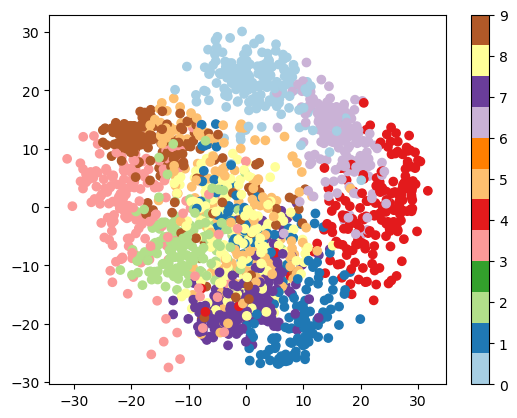

In [17]:
# Step - 13 - plot the principal components
plt.scatter(x_pca_2[:, 0], x_pca_2[:, 1], c=dataset.target, cmap="Paired")
plt.colorbar()

In [18]:
# Step - 14 - build PCA with 3 components, train the model and test the accuracy
number_of_components = 3
pca_3 = PCA(n_components= number_of_components)
x_pca_3 = pca_3.fit_transform(x)
x_pca_3.shape 
x_pca_3_train, x_pca_3_test, y_pca_3_train, y_pca_3_test = train_test_split(x_pca_3, y, test_size=0.2, random_state=30)
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(x_pca_3_train, y_pca_3_train)
model_pca.score(x_pca_3_test, y_pca_3_test)

0.675

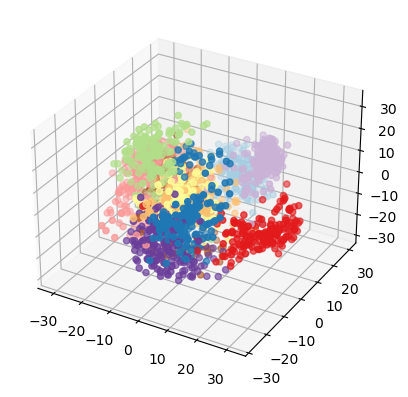

In [19]:
# Step - 15 - plot the principal components
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_pca_3[:,0], x_pca_3[:,1], x_pca_3[:,2], c=dataset.target, cmap="Paired")
plt.show()

### Conclusion 2: <a class="anchor" id="section_8_1_6"></a>
In the last two examples we saw that building PCA using exact components rather than 'asking' for a percentage of the useful information affects the accuracy. This is the trade mentioned in <i>What is PCA?</i> section. Since we are 'locked' in 3 dimensions, we tested what happens with 2 and 3 dimensions and saw that the accuracy increased from 60.83% to 67.5% when switched from 2 to 3 dimensions.

## Use case 2: Compress image using PCA <a class="anchor" id="section_9_1"></a>

### Introduction: <a class="anchor" id="section_9_1_1"></a>
In this case we will take a random image with relatively high resolution and compress it using principal component analysis. During the process we will split the RGB channels and compress them separately. Then we will reconstruct each channel individually and merge all 3 of them. This will happen step by step. Finally we will build a logic that will perform all the operations in loop

### Coding - step by step: <a class="anchor" id="section_9_1_2"></a>


In [20]:
# Step - 1 Load the image and convert the BGR scheme to RGB
# imgread - reads the image
# cvtColor - converts BGR to RGB
file_name = 'terry-vlisidis-RflgrtzU3Cw-unsplash.jpg'
image_3d = cv.cvtColor(cv.imread(file_name), cv.COLOR_BGR2RGB)

In [21]:
# Step - 2 Check and comment on the shape
# image_3d.shape - tuple with 3 elements - rows, columns and channels (RGB). The first and second elements
# represent the size of the image in pixels. We will treat this tuple as a dataset
image_3d.shape

(854, 1280, 3)

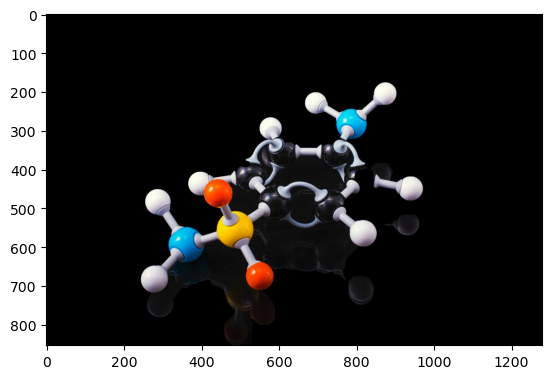

In [22]:
# Step - 3 We can check the actual image
plt.imshow(image_3d)

In [23]:
# Step - 4 Split and normalize the channels 
# The RGB will be compressed separately and them combined in the end so that we can see the quality of the
# compressed image and decide how many principal components will be need to achieve a satisfactory result.

red, green, blue =  cv.split(image_3d)
red, green, blue = red / 255, green / 255, blue / 255

# We can also check the individual channels 
# plt.imshow(red)
# plt.imshow(green)
# plt.imshow(blue)

In [24]:
# Step - 5 apply PCA to the channels separately

number_of_components = 100

pca_red = PCA(n_components=number_of_components)
reduced_red = pca_red.fit_transform(red)
# reduced_red.shape 

pca_green = PCA(n_components=number_of_components)
reduced_green = pca_green.fit_transform(green)
# reduced_green.shape

pca_blue = PCA(n_components=number_of_components)
reduced_blue = pca_blue.fit_transform(blue)
# reduced_green.shape

In [25]:
# Step - 6 combine the channels
combined_channels = np.array([reduced_red, reduced_green, reduced_blue])
combined_channels.shape

(3, 854, 100)

In [26]:
# Step - 7 reconstruct the channels

reconstructed_red = pca_red.inverse_transform(reduced_red)
reconstructed_green = pca_green.inverse_transform(reduced_green)
reconstructed_blue = pca_blue.inverse_transform(reduced_blue)
# reconstructed_red.shape
# reconstructed_green.shapea
# reconstructed_blue.shape

In [27]:
# Step - 8 - reconstruct the image
reconstructed_image = (cv.merge((reconstructed_red, reconstructed_green, reconstructed_blue)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


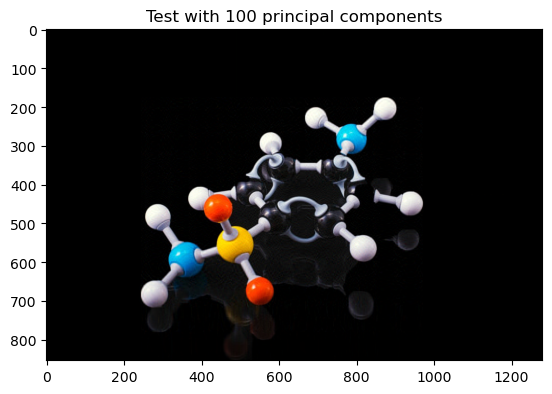

In [28]:
# Step - 9 - display the reconstructed image
plt.imshow(reconstructed_image)
plt.title("Test with 100 principal components")
plt.show()

### Coding - compression with loop: <a class="anchor" id="section_9_1_3"></a>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


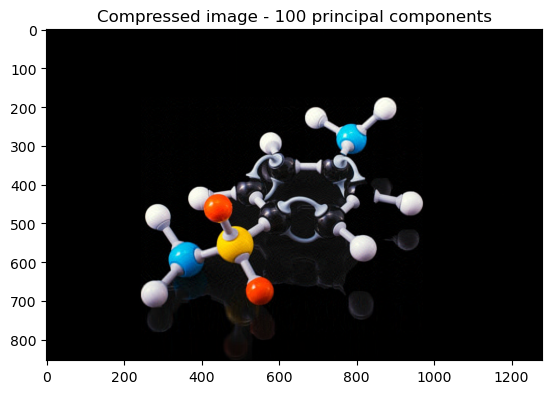

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


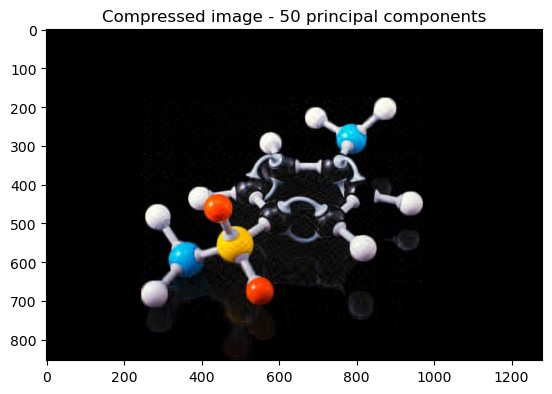

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


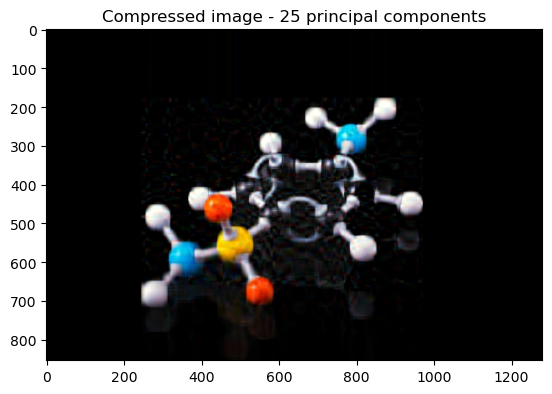

In [29]:
def reconstruct_image(reconstructed_red, reconstructed_green, reconstructed_blue):
    '''
    The functions expects N reconstructed channels
    Returns the result of merge
    '''
    
    return (cv.merge((reconstructed_red, reconstructed_green, reconstructed_blue)))


def reconstruct_channel(pca, reduced_channel):
    '''
    The functions expects model and reduced channel
    Returns the result of inverse transform
    '''
    
    return pca.inverse_transform(reduced_channel)


def apply_pca(components_num, norm_red, norm_green, norm_blue):
    '''
    The functions expects num of components (int) and 3 normalized channels
    Returns reconstructed image
    '''
    pca_red = PCA(n_components=components_num)
    reduced_red = pca_red.fit_transform(norm_red)
    reconstructed_red = reconstruct_channel(pca_red, reduced_red)
    
    pca_green = PCA(n_components=components_num)
    reduced_green = pca_green.fit_transform(norm_green)
    reconstructed_green = reconstruct_channel(pca_green, reduced_green)
    
    pca_blue = PCA(n_components=components_num)
    reduced_blue = pca_blue.fit_transform(norm_blue)
    reconstructed_blue = reconstruct_channel(pca_blue, reduced_blue)
    
    return reconstruct_image(reconstructed_red, reconstructed_green, reconstructed_blue)



def split_rgb(image):
    '''
    The functions expects image
    Returns normalized RGB channels
    '''
    red, green, blue =  cv.split(image)
    red, green, blue = red / 255, green / 255, blue / 255
    
    return red, green, blue


file_name = 'terry-vlisidis-RflgrtzU3Cw-unsplash.jpg'
image_3d = cv.cvtColor(cv.imread(file_name), cv.COLOR_BGR2RGB)

norm_red, norm_green, norm_blue = split_rgb(image_3d)

for components in [100, 50, 25]:
    reconstructed_image = apply_pca(components, norm_red, norm_green, norm_blue)
    plt.imshow(reconstructed_image)
    plt.title(f"Compressed image - {components} principal components")
    plt.show()

### Conclusion: <a class="anchor" id="section_9_1_4"></a>


It is not possible to apply PCA on the image as a whole. The RGB channels needs to be extracted and compressed individually. We can see that PCA works as <i>reduced_green.shape</i> shows lower number of dimensions, more specifically  the number we assign to <i>number_of_components</i>. In the automation section the number comes from the loop. After merging the channels and reconstructing the image, we see that 100 principal components produce good result. Lowering the number of components to 50 also brings acceptable result in terms of image quality while 25 principal components produce blury image. 

## Resources: <a class="anchor" id="section_10_1"></a>


### Eigenvalues and eigenvectors: <a class="anchor" id="section_10_1"></a>
 - https://medium.com/fintechexplained/what-are-eigenvalues-and-eigenvectors-a-must-know-concept-for-machine-learning-80d0fd330e47
 - https://towardsdatascience.com/eigen-intuitions-understanding-eigenvectors-and-eigenvalues-630e9ef1f719
 - https://math.hmc.edu/calculus/hmc-mathematics-calculus-online-tutorials/linear-algebra/eigenvalues-and-eigenvectors/
 - https://math.libretexts.org/Bookshelves/Linear_Algebra/A_First_Course_in_Linear_Algebra_(Kuttler)/07%3A_Spectral_Theory/7.01%3A_Eigenvalues_and_Eigenvectors_of_a_Matrix


### Projection: <a class="anchor" id="section_10_2"></a>
 - https://flexbooks.ck12.org/cbook/ck-12-precalculus-concepts-2.0/section/7.5/primary/lesson/vector-projection-pcalc/
 - https://en.wikipedia.org/wiki/Vector_projection
 - https://www.cuemath.com/geometry/projection-vector/

### PCA: <a class="anchor" id="section_10_3"></a>
 - https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186
 - https://builtin.com/data-science/step-step-explanation-principal-component-analysis
 - https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d
 - https://en.wikipedia.org/wiki/Principal_component_analysis
 - https://intellipaat.com/blog/a-brief-introduction-to-principal-component-analysis/?US
 - https://www.bigabid.com/what-is-pca-and-how-can-i-use-it/
 - https://statisticsglobe.com/advantages-disadvantages-pca
 - https://www.gatevidyalay.com/tag/principal-component-analysis-questions-and-answers/#google_vignette
 - https://www.geeksforgeeks.org/mathematical-approach-to-pca/

### Other: <a class="anchor" id="section_10_4"></a>
 - https://en.wikipedia.org/wiki/Covariance_matrix
 - https://www.cuemath.com/algebra/covariance-matrix/
 - https://www.geeksforgeeks.org/covariance-matrix/
 - https://en.wikipedia.org/wiki/Explained_variation
 - https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained
 - https://ro-che.info/articles/2017-12-11-pca-explained-variance
 - https://builtin.com/machine-learning/pca-in-python
 - https://www.jcchouinard.com/pca-with-python/
 - https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
 - https://matplotlib.org/stable/gallery/mplot3d/index.html
 - https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
 - https://www.kaggle.com/code/mirzarahim/introduction-to-pca-image-compression-example
 - https://towardsdatascience.com/pca-a-practical-journey-preprocessing-encoding-and-inspiring-applications-64371cb134a
 - https://www.youtube.com/watch?v=152tSYtiQbw
 - https://www.youtube.com/watch?v=8klqIM9UvAc
 - https://www.youtube.com/watch?v=3aUshxvxGhY&t